<a href="https://colab.research.google.com/github/SYJOO99/Public_Big_Data/blob/main/%EC%9A%B0%EC%9A%B8%EC%A6%9D%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **대한민국 우울지도 S변수 분석**

In [1]:
# pandas 라이브러리 pd로 import하기
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving S도출완료(+우울증유병률).csv to S도출완료(+우울증유병률).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['S도출완료(+우울증유병률).csv']))

In [4]:
df.head(5)

,No,시도,구군,최종_S,건강도메인 최대최소,안전도메인 최대최소,환경도메인최대최소,경제도메인 최대최소,사회적관계도메인 최대최소,여가도메인 최대최소,교육도메인 최대최소,우울증유병률
0,1,서울특별시,종로구,0.245104,0.124783,0.401559,0.662684,0.015073,0.339106,0.366890,0.267533,0.455882
1,2,서울특별시,중구,0.400109,0.204646,0.874067,0.767712,0.048739,0.590351,0.330909,0.617320,0.514706
2,3,서울특별시,용산구,0.478091,0.367713,0.541682,0.567134,0.326542,0.511988,0.718286,0.862729,0.235294
3,4,서울특별시,성동구,0.551587,0.551375,0.485346,0.617239,0.366098,0.508794,0.674273,0.792313,0.588235
4,5,서울특별시,광진구,0.516812,0.549781,0.584417,0.511931,0.514609,0.407182,0.668684,0.550345,0.279412




---



## 단순선형회귀분석

In [5]:
import matplotlib.pyplot as plt

In [6]:
from statsmodels.formula.api import ols
model = ols("우울증유병률 ~ 최종_S", data = df).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 우울증유병률   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     12.31
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           0.000543
Time:                        06:19:24   Log-Likelihood:                 50.617
No. Observations:                 229   AIC:                            -97.23
Df Residuals:                     227   BIC:                            -90.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0829      0.089      0.932      0.352      -0.092       0.258
최종_S           0.5953      0.170      3.509      0.001       0.261       0.930
==============================================================================
Omnibus:                        6.910   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                7.145
Skew:                           0.427   Prob(JB):                       0.0281
Kurtosis:                       2.859   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_

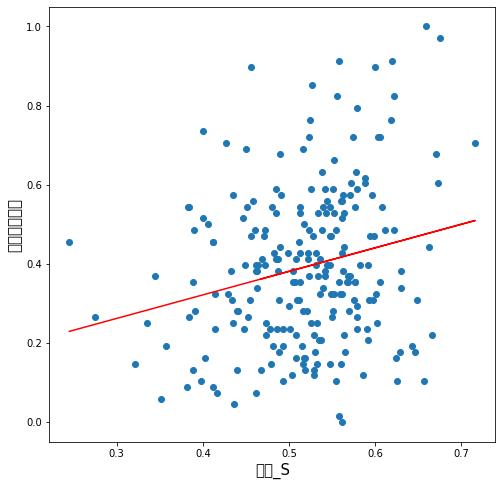

In [7]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['최종_S'],df['우울증유병률']) ## 원 데이터 산포도
plt.plot(df['최종_S'],model.fittedvalues,color='red') ## 회귀직선 추가
 
plt.xlabel('최종_S', fontsize=font_size)
plt.ylabel('우울증유병률',fontsize=font_size)
plt.show()